# Case Study : Lending Club
# Facilitator : 

# <font color = blue>RAJESH SUGURU <font/>

# Team: 

#  <font color = blue> RAJESH SUGURU  <font/>
#  <font color = blue> KUNAL GAIKWAD  <font/>            

## Case study outcome

 We would like to take this opportunity to apply the knowledge that we have aquired on Exploratory Data Analysis (EDA), by performing risk analytics on lendingclub.com data loan.csv and make recommendations to minimise the risk of losing money while lending to customers.

## Business Understanding (Ref: https://learn.upgrad.com/v/course/498/session/60420/segment/335855 )

You work for a consumer finance company which specialises in lending various types of loans to urban customers. When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two types of risks are associated with the bank’s decision:

If the applicant is likely to repay the loan, then not approving the loan results in a loss of business to the company

If the applicant is not likely to repay the loan, i.e. he/she is likely to default, then approving the loan may lead to a financial loss for the company

 

The data given below contains the information about past loan applicants and whether they ‘defaulted’ or not. The aim is to identify patterns which indicate if a person is likely to default, which may be used for taking actions such as denying the loan, reducing the amount of loan, lending (to risky applicants) at a higher interest rate, etc.

 

In this case study, you will use EDA to understand how <b>consumer attributes</b> and <b>loan attributes</b> influence the tendency of default.



When a person applies for a loan, there are <b>two types of decisions</b> that could be taken by the company:


1. <b>Loan accepted:</b> If the company approves the loan, there are 3 possible scenarios described below:

    - <b>Fully paid:</b> Applicant has fully paid the loan (the principal and the interest rate)
    - <b>Current:</b> Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. These candidates are not labelled as 'defaulted'.
    -  <b>Charged-off:</b> Applicant has not paid the instalments in due time for a long period of time, i.e. he/she has defaulted on the loan 
<p></p>
2. <b>Loan rejected:</b>The company had rejected the loan (because the candidate does not meet their requirements etc.). Since the loan was rejected, there is no transactional history of those applicants with the company and so this data is not available with the company (and thus in this dataset)


## Business Objectives 
This company is the largest online loan marketplace, facilitating personal loans, business loans, and financing of medical procedures. Borrowers can easily access lower interest rate loans through a fast online interface. 

 

Like most other lending companies, lending loans to ‘risky’ applicants is the largest source of financial loss (called credit loss). The credit loss is the amount of money lost by the lender when the borrower refuses to pay or runs away with the money owed. In other words, borrowers who <b>default</b> cause the largest amount of loss to the lenders. In this case, the customers labelled as 'charged-off' are the 'defaulters'. 

 

If one is able to identify these risky loan applicants, then such loans can be reduced thereby cutting down the amount of credit loss. Identification of such applicants using EDA is the aim of this case study.

 

In other words, the company wants to understand the <b>driving factors (or driver variables)</b> behind loan default, i.e. the variables which are strong indicators of default.  The company can utilise this knowledge for its portfolio and risk assessment. 



## Import required libraries
 > pandas <br/>
 > numpy <br/>
 > seaborn <br/>
 > matplotlib

In [187]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


## Set the various standard options
#### Set the rows and column limit to 500
#### Set the format of the float and all the values rouded to 2 decimals
#### Set the graph parameters

In [188]:
pd.set_option('display.max_rows', 500, 'display.max_columns', 500)
pd.options.display.float_format = '{:,.2f}'.format
%matplotlib inline
sns.set(style='whitegrid', rc={"grid.linewidth": 0.3})

#### Read the loan.csv and create data set loan_source_data

In [189]:
loan_source_data = pd.read_csv('loan.csv', error_bad_lines=False, index_col=False, dtype='unicode')

## Understanding the Data

In [190]:
loan_source_data.head()

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0  1077501   1296599      5000        5000            4975   36 months   
1  1077430   1314167      2500        2500            2500   60 months   
2  1077175   1313524      2400        2400            2400   36 months   
3  1076863   1277178     10000       10000           10000   36 months   
4  1075358   1311748      3000        3000            3000   60 months   

  int_rate installment grade sub_grade                 emp_title emp_length  \
0   10.65%      162.87     B        B2                       NaN  10+ years   
1   15.27%       59.83     C        C4                     Ryder   < 1 year   
2   15.96%       84.33     C        C5                       NaN  10+ years   
3   13.49%      339.31     C        C1       AIR RESOURCES BOARD  10+ years   
4   12.69%       67.79     B        B5  University Medical Group     1 year   

  home_ownership annual_inc verification_status issue_d  loan_status  \
0           RENT      24000            Verified  Dec-11   Fully Paid   
1           RENT      30000     Source Verified  Dec-11  Charged Off   
2           RENT      12252        Not Verified  Dec-11   Fully Paid   
3           RENT      49200     Source Verified  Dec-11   Fully Paid   
4           RENT      80000     Source Verified  Dec-11      Current   

  pymnt_plan                                                url  \
0          n  https://lendingclub.com/browse/loanDetail.acti...   
1          n  https://lendingclub.com/browse/loanDetail.acti...   
2          n  https://lendingclub.com/browse/loanDetail.acti...   
3          n  https://lendingclub.com/browse/loanDetail.acti...   
4          n  https://lendingclub.com/browse/loanDetail.acti...   

                                                desc         purpose  \
0    Borrower added on 12/22/11 > I need to upgra...     credit_card   
1    Borrower added on 12/22/11 > I plan to use t...             car   
2                                                NaN  small_business   
3    Borrower added on 12/21/11 > to pay for prop...           other   
4    Borrower added on 12/21/11 > I plan on combi...           other   

                  title zip_code addr_state    dti delinq_2yrs  \
0              Computer    860xx         AZ  27.65           0   
1                  bike    309xx         GA      1           0   
2  real estate business    606xx         IL   8.72           0   
3              personel    917xx         CA     20           0   
4              Personal    972xx         OR  17.94           0   

  earliest_cr_line inq_last_6mths mths_since_last_delinq  \
0           Jan-85              1                    NaN   
1           Apr-99              5                    NaN   
2           Nov-01              2                    NaN   
3           Feb-96              1                     35   
4           Jan-96              0                     38   

  mths_since_last_record open_acc pub_rec revol_bal revol_util total_acc  \
0                    NaN        3       0     13648     83.70%         9   
1                    NaN        3       0      1687      9.40%         4   
2                    NaN        2       0      2956     98.50%        10   
3                    NaN       10       0      5598        21%        37   
4                    NaN       15       0     27783     53.90%        38   

  initial_list_status out_prncp out_prncp_inv  total_pymnt total_pymnt_inv  \
0                   f         0             0  5863.155187         5833.84   
1                   f         0             0      1008.71         1008.71   
2                   f         0             0  3005.666844         3005.67   
3                   f         0             0     12231.89        12231.89   
4                   f    524.06        524.06      3513.33         3513.33   

  total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0            5000        863.16                  0          0   
1    

#### Overview of analysis is given below, but not limiting to the same

>> -  <font color = blue> Many columns with 100% missing (NaN) values might need to frop after analysis <br/> </font>
>> -  <font color = blue> Looks like some columns are not going to add value to draw meaningful insights need to handle those<br/></font>
>> -  <font color = blue> Some columns might need to convert tot the numeric format to perform calculations and aggregations on it<br/></font>
>> -  <font color = blue> Observe the categorical values to draw better insights<br/></font>
>> -  <font color = blue> To perform Business analysis might required to derive calculated values such as "profit and loss" and "Loan to Income ratio" percentages</font>
>> -  <font color = blue>Perform Univariate Analysis<br/> </font>
>> -  <font color = blue>Segmented Univariate Analysis<br/> </font>
>> -  <font color = blue>Bivariate Plots<br/> </font>
 
### Drawing inferences (conclusions) by using different set of plots and making recommendations


In [191]:
loan_source_data.shape

(39717, 111)

#### Total number of historical source loan data set

>> - Rows 39717  
>> - Columns 111

In [192]:
loan_source_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: object(111)
memory usage: 33.6+ MB


#### Validated the imported dataframes with the data set. Data imported is complete

### Missing Values refernce https://learn.upgrad.com/v/course/498/session/44768/segment/244281

>> - Identify missing data in dataframes<br/>
>> - Treat missing values based on the percentage of missing values and value add that brings for analysis.<br/> 
>> - Treat the missing values by either drop or impute  

In [193]:
percent_missing_values = loan_source_data.isnull().sum() * 100 / len(loan_source_data)
percent_missing_values

id                                 0.00
member_id                          0.00
loan_amnt                          0.00
funded_amnt                        0.00
funded_amnt_inv                    0.00
term                               0.00
int_rate                           0.00
installment                        0.00
grade                              0.00
sub_grade                          0.00
emp_title                          6.19
emp_length                         2.71
home_ownership                     0.00
annual_inc                         0.00
verification_status                0.00
issue_d                            0.00
loan_status                        0.00
pymnt_plan                         0.00
url                                0.00
desc                              32.58
purpose                            0.00
title                              0.03
zip_code                           0.00
addr_state                         0.00
dti                                0.00


#### Observations and action items
>> - Noticed many columns with 100% missing values. 
>> - Create dataframe missing_values_df with the percentages of missing values
>> - Drop the columns with 100% missing values

In [194]:
missing_values_df = pd.DataFrame({'column_name': loan_source_data.columns,
                                 'percentage_missing_values': percent_missing_values})
missing_values_df.sort_values('percentage_missing_values', inplace=True,ascending="false")

missing_values_df

column_name  \
id                                                          id   
earliest_cr_line                              earliest_cr_line   
inq_last_6mths                                  inq_last_6mths   
open_acc                                              open_acc   
pub_rec                                                pub_rec   
revol_bal                                            revol_bal   
total_acc                                            total_acc   
initial_list_status                        initial_list_status   
out_prncp                                            out_prncp   
out_prncp_inv                                    out_prncp_inv   
delinq_2yrs                                        delinq_2yrs   
total_pymnt                                        total_pymnt   
total_rec_int                                    total_rec_int   
total_rec_late_fee                          total_rec_late_fee   
recoveries                                          recoveries   
collection_recovery_fee                collection_recovery_fee   
last_pymnt_amnt                                last_pymnt_amnt   
policy_code                                        policy_code   
application_type                              application_type   
acc_now_delinq                                  acc_now_delinq   
delinq_amnt                                        delinq_amnt   
total_pymnt_inv                                total_pymnt_inv   
dti                                                        dti   
total_rec_prncp                                total_rec_prncp   
zip_code                                              zip_code   
member_id                                            member_id   
loan_amnt                                            loan_amnt   
addr_state                                          addr_state   
funded_amnt_inv                                funded_amnt_inv   
term                                                      term   
int_rate                                              int_rate   
installment                                        installment   
grade                                                    grade   
sub_grade                                            sub_grade   
home_ownership                                  home_ownership   
annual_inc                                          annual_inc   
funded_amnt                                        funded_amnt   
issue_d                                                issue_d   
purpose                                                purpose   
verification_status                        verification_status   
loan_status                                        loan_status   
pymnt_plan                                          pymnt_plan   
url                                                        url   
last_credit_pull_d                          last_credit_pull_d   
title                                                    title   
tax_liens                                            tax_liens   
revol_util                                          revol_util   
collections_12_mths_ex_med          collections_12_mths_ex_med   
chargeoff_within_12_mths              chargeoff_within_12_mths   
last_pymnt_d                                      last_pymnt_d   
pub_rec_bankruptcies                      pub_rec_bankruptcies   
emp_length                                          emp_length   
emp_title                                            emp_title   
desc                                                      desc   
mths_since_last_delinq                  mths_since_last_delinq   
mths_since_last_record                  mths_since_last_record   
next_pymnt_d                                      next_pymnt_d   
num_bc_sats                                        num_bc_sats   
mths_since_recent_bc                      mths_since_recent_bc   
mths_since_recent_bc_dlq              mths_since_recent_bc_dlq   
mths_since_recent_inq    

#### Identify number of columns with 100% missing data

In [195]:
(missing_values_df['percentage_missing_values'] == 100.00).sum()

54

#### Out of 111 columns available in original data set identified 54 columns with 100% missing values. 
These 54 columns with 100% missing values are not going to add any value for analysis and no better way to impute, hence decided to delete
#### Extract the qualified column names for deletion in next step as a list

In [196]:
list_of_missing_values_columns = missing_values_df[(missing_values_df['percentage_missing_values'] == 100.00)].column_name.tolist()
print("List of columns required to be dropped due to 100% missing values: \n", list_of_missing_values_columns)
print("Total number of columns qualified to be dropped:",len(list_of_missing_values_columns))

List of columns required to be dropped due to 100% missing values: 
 ['num_bc_sats', 'mths_since_recent_bc', 'mths_since_recent_bc_dlq', 'mths_since_recent_inq', 'mths_since_recent_revol_delinq', 'num_accts_ever_120_pd', 'num_actv_bc_tl', 'num_actv_rev_tl', 'mort_acc', 'num_bc_tl', 'num_tl_op_past_12m', 'num_op_rev_tl', 'num_rev_accts', 'num_rev_tl_bal_gt_0', 'num_sats', 'num_tl_120dpd_2m', 'num_tl_30dpd', 'num_tl_90g_dpd_24m', 'pct_tl_nvr_dlq', 'percent_bc_gt_75', 'tot_hi_cred_lim', 'total_bal_ex_mort', 'mo_sin_rcnt_tl', 'num_il_tl', 'mo_sin_rcnt_rev_tl_op', 'verification_status_joint', 'mo_sin_old_il_acct', 'mths_since_last_major_derog', 'annual_inc_joint', 'dti_joint', 'total_bc_limit', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m', 'open_il_6m', 'open_il_12m', 'open_il_24m', 'mths_since_rcnt_il', 'total_bal_il', 'il_util', 'open_rv_12m', 'open_rv_24m', 'max_bal_bc', 'all_util', 'total_rev_hi_lim', 'inq_fi', 'total_cu_tl', 'inq_last_12m', 'acc_open_past_24mths', 'avg_cur_bal', 'bc_op

## <font color = blue>DATA CLEANING STARTS HERE</font>

#### Create clean_loan_data frame after dropping columns with 100% missing values in the main data frame loan_source_data

In [197]:
clean_loan_data = loan_source_data.drop(list_of_missing_values_columns, axis=1)
clean_loan_data

id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0      1077501   1296599      5000        5000            4975   36 months   
1      1077430   1314167      2500        2500            2500   60 months   
2      1077175   1313524      2400        2400            2400   36 months   
3      1076863   1277178     10000       10000           10000   36 months   
4      1075358   1311748      3000        3000            3000   60 months   
5      1075269   1311441      5000        5000            5000   36 months   
6      1069639   1304742      7000        7000            7000   60 months   
7      1072053   1288686      3000        3000            3000   36 months   
8      1071795   1306957      5600        5600            5600   60 months   
9      1071570   1306721      5375        5375            5350   60 months   
10     1070078   1305201      6500        6500            6500   60 months   
11     1069908   1305008     12000       12000           12000   36 months   
12     1064687   1298717      9000        9000            9000   36 months   
13     1069866   1304956      3000        3000            3000   36 months   
14     1069057   1303503     10000       10000           10000   36 months   
15     1069759   1304871      1000        1000            1000   36 months   
16     1065775   1299699     10000       10000           10000   36 months   
17     1069971   1304884      3600        3600            3600   36 months   
18     1062474   1294539      6000        6000            6000   36 months   
19     1069742   1304855      9200        9200            9200   36 months   
20     1069740   1284848     20250       20250     19142.16108   60 months   
21     1039153   1269083     21000       21000           21000   36 months   
22     1069710   1304821     10000       10000           10000   36 months   
23     1069700   1304810     10000       10000           10000   36 months   
24     1069559   1304634      6000        6000            6000   36 months   
25     1069697   1273773     15000       15000           15000   36 months   
26     1069800   1304679     15000       15000            8725   36 months   
27     1069657   1304764      5000        5000            5000   60 months   
28     1069799   1304678      4000        4000            4000   36 months   
29     1047704   1278806      8500        8500            8500   36 months   
30     1032111   1261745      4375        4375            4375   36 months   
31     1069539   1304608     31825       31825           31825   36 months   
32     1065420   1299514     10000       10000            9975   60 months   
33     1069591   1304289      5000        5000            5000   36 months   
34     1069530   1291365      7000        7000            7000   36 months   
35     1069522   1304589     12400       12400           12400   36 months   
36     1069361   1304255     10800       10800           10800   36 months   
37     1069357   1304251     15000       15000           15000   36 months   
38     1069356   1304250      6000        6000            6000   36 months   
39     1069346   1304237     12500       12500           12475   60 months   
40     1067573   1301955      9600        9600            9600   36 months   
41     1069506   1304567     12000       12000           12000   36 months   
42     1069314   1304202      3000        3000            3000   36 months   
43     1060578   1292332      4400        4400            4400   36 months   
44     1069469   1304526      6000        6000            6000   36 months   
45     1051117   1282787     14000       14000           14000   36 months   
46     1069465   1304521      5000        5000            5000   36 months   
47     1069283   1304166     10000       10000           10000   36 months   
48     1069287   1304171     10000       10000           10000   36 months   
49     1069453   1303701     11000       11000           11000   36 months   
50     1069248   1304123     15000

#### After dropping columns with 100% missing data next focus of data clean up on other heighest missing data columns and the columns those are not useful for analysis
#### Decided to drop below columns based on missing data
>> - mths_since_last_record	mths_since_last_record	92.99 <br/>
>> - next_pymnt_d	next_pymnt_d	97.13 <br/>
>> - mths_since_last_delinq	mths_since_last_delinq	64.66 <br/>


In [198]:
clean_loan_data = clean_loan_data.drop(['next_pymnt_d','mths_since_last_record','mths_since_last_delinq'], axis=1)
clean_loan_data


id member_id loan_amnt funded_amnt funded_amnt_inv        term  \
0      1077501   1296599      5000        5000            4975   36 months   
1      1077430   1314167      2500        2500            2500   60 months   
2      1077175   1313524      2400        2400            2400   36 months   
3      1076863   1277178     10000       10000           10000   36 months   
4      1075358   1311748      3000        3000            3000   60 months   
5      1075269   1311441      5000        5000            5000   36 months   
6      1069639   1304742      7000        7000            7000   60 months   
7      1072053   1288686      3000        3000            3000   36 months   
8      1071795   1306957      5600        5600            5600   60 months   
9      1071570   1306721      5375        5375            5350   60 months   
10     1070078   1305201      6500        6500            6500   60 months   
11     1069908   1305008     12000       12000           12000   36 months   
12     1064687   1298717      9000        9000            9000   36 months   
13     1069866   1304956      3000        3000            3000   36 months   
14     1069057   1303503     10000       10000           10000   36 months   
15     1069759   1304871      1000        1000            1000   36 months   
16     1065775   1299699     10000       10000           10000   36 months   
17     1069971   1304884      3600        3600            3600   36 months   
18     1062474   1294539      6000        6000            6000   36 months   
19     1069742   1304855      9200        9200            9200   36 months   
20     1069740   1284848     20250       20250     19142.16108   60 months   
21     1039153   1269083     21000       21000           21000   36 months   
22     1069710   1304821     10000       10000           10000   36 months   
23     1069700   1304810     10000       10000           10000   36 months   
24     1069559   1304634      6000        6000            6000   36 months   
25     1069697   1273773     15000       15000           15000   36 months   
26     1069800   1304679     15000       15000            8725   36 months   
27     1069657   1304764      5000        5000            5000   60 months   
28     1069799   1304678      4000        4000            4000   36 months   
29     1047704   1278806      8500        8500            8500   36 months   
30     1032111   1261745      4375        4375            4375   36 months   
31     1069539   1304608     31825       31825           31825   36 months   
32     1065420   1299514     10000       10000            9975   60 months   
33     1069591   1304289      5000        5000            5000   36 months   
34     1069530   1291365      7000        7000            7000   36 months   
35     1069522   1304589     12400       12400           12400   36 months   
36     1069361   1304255     10800       10800           10800   36 months   
37     1069357   1304251     15000       15000           15000   36 months   
38     1069356   1304250      6000        6000            6000   36 months   
39     1069346   1304237     12500       12500           12475   60 months   
40     1067573   1301955      9600        9600            9600   36 months   
41     1069506   1304567     12000       12000           12000   36 months   
42     1069314   1304202      3000        3000            3000   36 months   
43     1060578   1292332      4400        4400            4400   36 months   
44     1069469   1304526      6000        6000            6000   36 months   
45     1051117   1282787     14000       14000           14000   36 months   
46     1069465   1304521      5000        5000            5000   36 months   
47     1069283   1304166     10000       10000           10000   36 months   
48     1069287   1304171     10000       10000           10000   36 months   
49     1069453   1303701     11000       11000           11000   36 months   
50     1069248   1304123     15000

#### Next focus is on cleaning the data that is not useful for analysis such as
>> - As it is historical data id and member_id doesn't make any sense for analysis <br/>
>> - url is not going to add any value to draw any inferences<br/>
>> - desc (description) not useful parameter to draw any insights<br/>

#### Decided to drop all the above columns


In [199]:
clean_loan_data = clean_loan_data.drop([ 'id','member_id', 'url','desc'], axis=1)
clean_loan_data

loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0          5000        5000            4975   36 months   10.65%      162.87   
1          2500        2500            2500   60 months   15.27%       59.83   
2          2400        2400            2400   36 months   15.96%       84.33   
3         10000       10000           10000   36 months   13.49%      339.31   
4          3000        3000            3000   60 months   12.69%       67.79   
5          5000        5000            5000   36 months    7.90%      156.46   
6          7000        7000            7000   60 months   15.96%      170.08   
7          3000        3000            3000   36 months   18.64%      109.43   
8          5600        5600            5600   60 months   21.28%      152.39   
9          5375        5375            5350   60 months   12.69%      121.45   
10         6500        6500            6500   60 months   14.65%      153.45   
11        12000       12000           12000   36 months   12.69%      402.54   
12         9000        9000            9000   36 months   13.49%      305.38   
13         3000        3000            3000   36 months    9.91%       96.68   
14        10000       10000           10000   36 months   10.65%      325.74   
15         1000        1000            1000   36 months   16.29%       35.31   
16        10000       10000           10000   36 months   15.27%      347.98   
17         3600        3600            3600   36 months    6.03%      109.57   
18         6000        6000            6000   36 months   11.71%      198.46   
19         9200        9200            9200   36 months    6.03%      280.01   
20        20250       20250     19142.16108   60 months   15.27%      484.63   
21        21000       21000           21000   36 months   12.42%      701.73   
22        10000       10000           10000   36 months   11.71%      330.76   
23        10000       10000           10000   36 months   11.71%      330.76   
24         6000        6000            6000   36 months   11.71%      198.46   
25        15000       15000           15000   36 months    9.91%      483.38   
26        15000       15000            8725   36 months   14.27%      514.64   
27         5000        5000            5000   60 months   16.77%      123.65   
28         4000        4000            4000   36 months   11.71%      132.31   
29         8500        8500            8500   36 months   11.71%      281.15   
30         4375        4375            4375   36 months    7.51%      136.11   
31        31825       31825           31825   36 months    7.90%      995.82   
32        10000       10000            9975   60 months   15.96%      242.97   
33         5000        5000            5000   36 months    8.90%      158.77   
34         7000        7000            7000   36 months   15.96%      245.97   
35        12400       12400           12400   36 months   10.65%      403.91   
36        10800       10800           10800   36 months    9.91%      348.03   
37        15000       15000           15000   36 months    7.90%      469.36   
38         6000        6000            6000   36 months   12.42%       200.5   
39        12500       12500           12475   60 months   12.69%      282.44   
40         9600        9600            9600   36 months    7.51%      298.67   
41        12000       12000           12000   36 months    7.90%      375.49   
42         3000        3000            3000   36 months   18.25%      108.84   
43         4400        4400            4400   36 months   16.77%      156.37   
44         6000        6000            6000   36 months    6.03%      182.62   
45        14000       14000           14000   36 months    9.91%      451.15   
46         5000        5000            5000   36 months    8.90%      158.77   
47        10000       10000           10000   36 months   10.65%      325.74   
48        10000       10000           10000   36 months    6.03%      304.36   
49    

#### Identify the columns with unique values

>> - Columns with unique values are not going to add any value to the analysis as correlation of these columns with other columns won't make any difference
>> - Decided to drop columns with unique values

In [200]:
clean_loan_data.nunique()

loan_amnt                       885
funded_amnt                    1041
funded_amnt_inv                8205
term                              2
int_rate                        371
installment                   15383
grade                             7
sub_grade                        35
emp_title                     28820
emp_length                       11
home_ownership                    5
annual_inc                     5318
verification_status               3
issue_d                          55
loan_status                       3
pymnt_plan                        1
purpose                          14
title                         19615
zip_code                        823
addr_state                       50
dti                            2868
delinq_2yrs                      11
earliest_cr_line                526
inq_last_6mths                    9
open_acc                         40
pub_rec                           5
revol_bal                     21711
revol_util                  

In [201]:
columns_with_one_unique_value = [k for k,v in clean_loan_data.nunique().to_dict().items() if v==1]
columns_with_one_unique_value

['pymnt_plan',
 'initial_list_status',
 'collections_12_mths_ex_med',
 'policy_code',
 'application_type',
 'acc_now_delinq',
 'chargeoff_within_12_mths',
 'delinq_amnt',
 'tax_liens']

In [202]:
clean_loan_data = clean_loan_data.drop(columns_with_one_unique_value,axis=1)


In [203]:
print(clean_loan_data.shape)
clean_loan_data.head()

(39717, 41)


loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0      5000        5000            4975   36 months   10.65%      162.87   
1      2500        2500            2500   60 months   15.27%       59.83   
2      2400        2400            2400   36 months   15.96%       84.33   
3     10000       10000           10000   36 months   13.49%      339.31   
4      3000        3000            3000   60 months   12.69%       67.79   

  grade sub_grade                 emp_title emp_length home_ownership  \
0     B        B2                       NaN  10+ years           RENT   
1     C        C4                     Ryder   < 1 year           RENT   
2     C        C5                       NaN  10+ years           RENT   
3     C        C1       AIR RESOURCES BOARD  10+ years           RENT   
4     B        B5  University Medical Group     1 year           RENT   

  annual_inc verification_status issue_d  loan_status         purpose  \
0      24000            Verified  Dec-11   Fully Paid     credit_card   
1      30000     Source Verified  Dec-11  Charged Off             car   
2      12252        Not Verified  Dec-11   Fully Paid  small_business   
3      49200     Source Verified  Dec-11   Fully Paid           other   
4      80000     Source Verified  Dec-11      Current           other   

                  title zip_code addr_state    dti delinq_2yrs  \
0              Computer    860xx         AZ  27.65           0   
1                  bike    309xx         GA      1           0   
2  real estate business    606xx         IL   8.72           0   
3              personel    917xx         CA     20           0   
4              Personal    972xx         OR  17.94           0   

  earliest_cr_line inq_last_6mths open_acc pub_rec revol_bal revol_util  \
0           Jan-85              1        3       0     13648     83.70%   
1           Apr-99              5        3       0      1687      9.40%   
2           Nov-01              2        2       0      2956     98.50%   
3           Feb-96              1       10       0      5598        21%   
4           Jan-96              0       15       0     27783     53.90%   

  total_acc out_prncp out_prncp_inv  total_pymnt total_pymnt_inv  \
0         9         0             0  5863.155187         5833.84   
1         4         0             0      1008.71         1008.71   
2        10         0             0  3005.666844         3005.67   
3        37         0             0     12231.89        12231.89   
4        38    524.06        524.06      3513.33         3513.33   

  total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0            5000        863.16                  0          0   
1          456.46        435.17                  0     117.08   
2            2400        605.67                  0          0   
3           10000       2214.92              16.97          0   
4         2475.94       1037.39                  0          0   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                       0       Jan-15          171.62             May-16   
1                    1.11       Apr-13          119.66             Sep-13   
2                       0       Jun-14          649.91             May-16   
3                       0       Jan-15          357.48             Apr-16   
4                       0       May-16           67.79             May-16   

  pub_rec_bankruptcies  
0                    0  
1                    0  
2                    0  
3                    0  
4                    0

#### One last thing that we can drop is emp_title as it's got many of those are unique values

In [204]:
clean_loan_data = clean_loan_data.drop(['emp_title'], axis=1)

#### It's time to check the percentage of missing data after clean up performed and created clean data set clean_loan_data

In [205]:

((clean_loan_data.isnull().sum() * 100 / len(clean_loan_data)).sort_values(ascending=False)).head(20)

emp_length             2.71
pub_rec_bankruptcies   1.75
last_pymnt_d           0.18
revol_util             0.13
title                  0.03
last_credit_pull_d     0.01
annual_inc             0.00
zip_code               0.00
purpose                0.00
loan_status            0.00
issue_d                0.00
verification_status    0.00
funded_amnt            0.00
addr_state             0.00
sub_grade              0.00
grade                  0.00
installment            0.00
int_rate               0.00
term                   0.00
funded_amnt_inv        0.00
dtype: float64

In [206]:
clean_loan_data.shape

(39717, 40)

## <font color = blue>DATA CLEANING ENDS HERE </font>

## <font color = gray>DATA PREPARATION FOR ***EXPLORATORY DATA ANALYSIS*** STARTS HERE</font>

## Prepare Categorical Variables (Some EDA references are given below)
Ref : https://learn.upgrad.com/v/course/498/module/20548 <br/>
>> https://learn.upgrad.com/v/course/498/session/60416/segment/335826

In [207]:
column_count_data = []
for row in clean_loan_data.columns.tolist():
    column_count_data.append({'column': row, 'count': len(clean_loan_data[row].unique())})
column_count_data

[{'column': 'loan_amnt', 'count': 885},
 {'column': 'funded_amnt', 'count': 1041},
 {'column': 'funded_amnt_inv', 'count': 8205},
 {'column': 'term', 'count': 2},
 {'column': 'int_rate', 'count': 371},
 {'column': 'installment', 'count': 15383},
 {'column': 'grade', 'count': 7},
 {'column': 'sub_grade', 'count': 35},
 {'column': 'emp_length', 'count': 12},
 {'column': 'home_ownership', 'count': 5},
 {'column': 'annual_inc', 'count': 5318},
 {'column': 'verification_status', 'count': 3},
 {'column': 'issue_d', 'count': 55},
 {'column': 'loan_status', 'count': 3},
 {'column': 'purpose', 'count': 14},
 {'column': 'title', 'count': 19616},
 {'column': 'zip_code', 'count': 823},
 {'column': 'addr_state', 'count': 50},
 {'column': 'dti', 'count': 2868},
 {'column': 'delinq_2yrs', 'count': 11},
 {'column': 'earliest_cr_line', 'count': 526},
 {'column': 'inq_last_6mths', 'count': 9},
 {'column': 'open_acc', 'count': 40},
 {'column': 'pub_rec', 'count': 5},
 {'column': 'revol_bal', 'count': 217

In [208]:
unique_count = pd.DataFrame(column_count_data).sort_values('count')

In [209]:
unique_count.head(10)

column  count
3                   term      2
13           loan_status      3
11   verification_status      3
39  pub_rec_bankruptcies      4
23               pub_rec      5
9         home_ownership      5
6                  grade      7
21        inq_last_6mths      9
19           delinq_2yrs     11
8             emp_length     12

## Prepare derived columns to perform better Analysis on clean data

In [210]:
clean_loan_data.head(10)

loan_amnt funded_amnt funded_amnt_inv        term int_rate installment  \
0      5000        5000            4975   36 months   10.65%      162.87   
1      2500        2500            2500   60 months   15.27%       59.83   
2      2400        2400            2400   36 months   15.96%       84.33   
3     10000       10000           10000   36 months   13.49%      339.31   
4      3000        3000            3000   60 months   12.69%       67.79   
5      5000        5000            5000   36 months    7.90%      156.46   
6      7000        7000            7000   60 months   15.96%      170.08   
7      3000        3000            3000   36 months   18.64%      109.43   
8      5600        5600            5600   60 months   21.28%      152.39   
9      5375        5375            5350   60 months   12.69%      121.45   

  grade sub_grade emp_length home_ownership annual_inc verification_status  \
0     B        B2  10+ years           RENT      24000            Verified   
1     C        C4   < 1 year           RENT      30000     Source Verified   
2     C        C5  10+ years           RENT      12252        Not Verified   
3     C        C1  10+ years           RENT      49200     Source Verified   
4     B        B5     1 year           RENT      80000     Source Verified   
5     A        A4    3 years           RENT      36000     Source Verified   
6     C        C5    8 years           RENT      47004        Not Verified   
7     E        E1    9 years           RENT      48000     Source Verified   
8     F        F2    4 years            OWN      40000     Source Verified   
9     B        B5   < 1 year           RENT      15000            Verified   

  issue_d  loan_status             purpose  \
0  Dec-11   Fully Paid         credit_card   
1  Dec-11  Charged Off                 car   
2  Dec-11   Fully Paid      small_business   
3  Dec-11   Fully Paid               other   
4  Dec-11      Current               other   
5  Dec-11   Fully Paid             wedding   
6  Dec-11   Fully Paid  debt_consolidation   
7  Dec-11   Fully Paid                 car   
8  Dec-11  Charged Off      small_business   
9  Dec-11  Charged Off               other   

                                   title zip_code addr_state    dti  \
0                               Computer    860xx         AZ  27.65   
1                                   bike    309xx         GA      1   
2                   real estate business    606xx         IL   8.72   
3                               personel    917xx         CA     20   
4                               Personal    972xx         OR  17.94   
5  My wedding loan I promise to pay back    852xx         AZ   11.2   
6                                   Loan    280xx         NC  23.51   
7                        Car Downpayment    900xx         CA   5.35   
8   Expand Business & Buy Debt Portfolio    958xx         CA   5.55   
9            Building my credit history.    774xx         TX  18.08   

  delinq_2yrs earliest_cr_line inq_last_6mths open_acc pub_rec revol_bal  \
0           0           Jan-85              1        3       0     13648   
1           0           Apr-99              5        3       0      1687   
2           0           Nov-01              2        2       0      2956   
3           0           Feb-96              1       10       0      5598   
4           0           Jan-96              0       15       0     27783   
5           0           Nov-04              3        9       0      7963   
6           0           Jul-05              1        7       0     17726   
7           0           Jan-07              2        4       0      8221   
8           0           Apr-04              2       11       0      5210   
9           0           Sep-04              0        2       0      9279   

  revol_util total_acc out_prncp out_prncp_inv  total_pymnt total_pymnt_inv  \
0     83.70%         9         0             0  5863.155187         5833.84   
1      9.40%         4

#### From the above data identified below derived column requirements
>> 1) From the column term ,derive the new column term_months by stripping "months" <br/>
>> 2) From column int_rate , derive new column by stripping % (percentage)<br/>
>> 3) Impute values to emp_length  with special characters such as 10+ anf <1 year and remove the text "years" just to retain only numeric values <br/>
>> 4) From column revol_util , derive new column by stripping % (percentage)<br/>
>> 5) From all the date columns derive the Month and Year column Identified date columns are as given below <br/>
>>> i) issue_d<br/>
>>> ii) last_credit_pull_d<br/>
>>> iii) last_pymnt_d<br/>
>>> iv) earliest_cr_line<br/>

#### Delete some of the original columns after derived columns are rightly populated

In [211]:
clean_loan_data['term_months'] = clean_loan_data['term'].str.rstrip('months')


In [212]:
clean_loan_data['int_rate_percentage'] = clean_loan_data['int_rate'].str.rstrip('%')


In [213]:
clean_loan_data['emp_length_years'] = clean_loan_data['emp_length'].str.rstrip('years ')
clean_loan_data['emp_length_years'].replace({'10+': '10'}, inplace=True)
clean_loan_data['emp_length_years'][clean_loan_data['emp_length_years'] == '< 1'] = '0.5'


In [214]:
clean_loan_data['revol_util_percentage'] = clean_loan_data['revol_util'].str.rstrip('%')


In [215]:
clean_loan_data['issue_d_month'], clean_loan_data['issue_d_year'] = clean_loan_data['issue_d'].str.split('-').str

clean_loan_data['last_credit_pull_d_month'], clean_loan_data['last_credit_pull_d_year'] = clean_loan_data['last_credit_pull_d'].str.split('-').str

clean_loan_data['last_pymnt_d_month'], clean_loan_data['last_pymnt_d_year'] = clean_loan_data['last_pymnt_d'].str.split('-').str

clean_loan_data['earliest_cr_line_month'], clean_loan_data['earliest_cr_line_year'] = clean_loan_data['earliest_cr_line'].str.split('-').str


In [216]:
clean_loan_data['issue_d_year'] = '20' + clean_loan_data['issue_d_year']

In [217]:
del clean_loan_data['term']
del clean_loan_data['int_rate']
del clean_loan_data['emp_length']
del clean_loan_data['revol_util']

In [218]:
clean_loan_data.head(10)

loan_amnt funded_amnt funded_amnt_inv installment grade sub_grade  \
0      5000        5000            4975      162.87     B        B2   
1      2500        2500            2500       59.83     C        C4   
2      2400        2400            2400       84.33     C        C5   
3     10000       10000           10000      339.31     C        C1   
4      3000        3000            3000       67.79     B        B5   
5      5000        5000            5000      156.46     A        A4   
6      7000        7000            7000      170.08     C        C5   
7      3000        3000            3000      109.43     E        E1   
8      5600        5600            5600      152.39     F        F2   
9      5375        5375            5350      121.45     B        B5   

  home_ownership annual_inc verification_status issue_d  loan_status  \
0           RENT      24000            Verified  Dec-11   Fully Paid   
1           RENT      30000     Source Verified  Dec-11  Charged Off   
2           RENT      12252        Not Verified  Dec-11   Fully Paid   
3           RENT      49200     Source Verified  Dec-11   Fully Paid   
4           RENT      80000     Source Verified  Dec-11      Current   
5           RENT      36000     Source Verified  Dec-11   Fully Paid   
6           RENT      47004        Not Verified  Dec-11   Fully Paid   
7           RENT      48000     Source Verified  Dec-11   Fully Paid   
8            OWN      40000     Source Verified  Dec-11  Charged Off   
9           RENT      15000            Verified  Dec-11  Charged Off   

              purpose                                  title zip_code  \
0         credit_card                               Computer    860xx   
1                 car                                   bike    309xx   
2      small_business                   real estate business    606xx   
3               other                               personel    917xx   
4               other                               Personal    972xx   
5             wedding  My wedding loan I promise to pay back    852xx   
6  debt_consolidation                                   Loan    280xx   
7                 car                        Car Downpayment    900xx   
8      small_business   Expand Business & Buy Debt Portfolio    958xx   
9               other            Building my credit history.    774xx   

  addr_state    dti delinq_2yrs earliest_cr_line inq_last_6mths open_acc  \
0         AZ  27.65           0           Jan-85              1        3   
1         GA      1           0           Apr-99              5        3   
2         IL   8.72           0           Nov-01              2        2   
3         CA     20           0           Feb-96              1       10   
4         OR  17.94           0           Jan-96              0       15   
5         AZ   11.2           0           Nov-04              3        9   
6         NC  23.51           0           Jul-05              1        7   
7         CA   5.35           0           Jan-07              2        4   
8         CA   5.55           0           Apr-04              2       11   
9         TX  18.08           0           Sep-04              0        2   

  pub_rec revol_bal total_acc out_prncp out_prncp_inv  total_pymnt  \
0       0     13648         9         0             0  5863.155187   
1       0      1687         4         0             0      1008.71   
2       0      2956        10         0             0  3005.666844   
3       0      5598        37         0             0     12231.89   
4       0     27783        38    524.06        524.06      3513.33   
5       0      7963        12         0             0      5632.21   
6       0     17726        11         0             0     10110.84   
7       0      8221         4         0             0  3939.135294   
8       0      5210        13         0             0       646.02   
9       0      9279         3         0             0      1476.19   

  total_pymnt_i

## Conversion of the columns to the right data types starts here

In [219]:
clean_loan_data.info() #All columns currently saved as object type in the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
loan_amnt                   39717 non-null object
funded_amnt                 39717 non-null object
funded_amnt_inv             39717 non-null object
installment                 39717 non-null object
grade                       39717 non-null object
sub_grade                   39717 non-null object
home_ownership              39717 non-null object
annual_inc                  39717 non-null object
verification_status         39717 non-null object
issue_d                     39717 non-null object
loan_status                 39717 non-null object
purpose                     39717 non-null object
title                       39706 non-null object
zip_code                    39717 non-null object
addr_state                  39717 non-null object
dti                         39717 non-null object
delinq_2yrs                 39717 non-null object
earliest_cr_line            39717 non-nul

## Align the datatypes of the columns based on the data covered in the columns
>> Convert all the columns consisting of numbers to Float datatype

In [220]:
clean_loan_data.head()

loan_amnt funded_amnt funded_amnt_inv installment grade sub_grade  \
0      5000        5000            4975      162.87     B        B2   
1      2500        2500            2500       59.83     C        C4   
2      2400        2400            2400       84.33     C        C5   
3     10000       10000           10000      339.31     C        C1   
4      3000        3000            3000       67.79     B        B5   

  home_ownership annual_inc verification_status issue_d  loan_status  \
0           RENT      24000            Verified  Dec-11   Fully Paid   
1           RENT      30000     Source Verified  Dec-11  Charged Off   
2           RENT      12252        Not Verified  Dec-11   Fully Paid   
3           RENT      49200     Source Verified  Dec-11   Fully Paid   
4           RENT      80000     Source Verified  Dec-11      Current   

          purpose                 title zip_code addr_state    dti  \
0     credit_card              Computer    860xx         AZ  27.65   
1             car                  bike    309xx         GA      1   
2  small_business  real estate business    606xx         IL   8.72   
3           other              personel    917xx         CA     20   
4           other              Personal    972xx         OR  17.94   

  delinq_2yrs earliest_cr_line inq_last_6mths open_acc pub_rec revol_bal  \
0           0           Jan-85              1        3       0     13648   
1           0           Apr-99              5        3       0      1687   
2           0           Nov-01              2        2       0      2956   
3           0           Feb-96              1       10       0      5598   
4           0           Jan-96              0       15       0     27783   

  total_acc out_prncp out_prncp_inv  total_pymnt total_pymnt_inv  \
0         9         0             0  5863.155187         5833.84   
1         4         0             0      1008.71         1008.71   
2        10         0             0  3005.666844         3005.67   
3        37         0             0     12231.89        12231.89   
4        38    524.06        524.06      3513.33         3513.33   

  total_rec_prncp total_rec_int total_rec_late_fee recoveries  \
0            5000        863.16                  0          0   
1          456.46        435.17                  0     117.08   
2            2400        605.67                  0          0   
3           10000       2214.92              16.97          0   
4         2475.94       1037.39                  0          0   

  collection_recovery_fee last_pymnt_d last_pymnt_amnt last_credit_pull_d  \
0                       0       Jan-15          171.62             May-16   
1                    1.11       Apr-13          119.66             Sep-13   
2                       0       Jun-14          649.91             May-16   
3                       0       Jan-15          357.48             Apr-16   
4                       0       May-16           67.79             May-16   

  pub_rec_bankruptcies term_months int_rate_percentage emp_length_years  \
0                    0         36                10.65               10   
1                    0         60                15.27              0.5   
2                    0         36                15.96               10   
3                    0         36                13.49               10   
4                    0         60                12.69                1   

  revol_util_percentage issue_d_month issue_d_year last_credit_pull_d_month  \
0                 83.70           Dec         2011                      May   
1                  9.40           Dec         2011                      Sep   
2                 98.50           Dec         2011                      May   
3                    21           Dec         2011                      Apr   
4                 53.90           Dec         2011                      May   

  last_credit_pull_d_year last_pymnt_d_month last_pymnt_d_year  \
0        

In [221]:
numeric_columns = ['loan_amnt', 'funded_amnt','funded_amnt_inv', 'installment', 'annual_inc', 'emp_length_years', 'dti', 
          'revol_bal', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
          'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'int_rate_percentage', 'emp_length_years',
          'revol_util_percentage']
clean_loan_data[numeric_columns] = clean_loan_data[numeric_columns].astype(np.float)

#### Verify the data types of the columns

In [222]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 48 columns):
loan_amnt                   39717 non-null float64
funded_amnt                 39717 non-null float64
funded_amnt_inv             39717 non-null float64
installment                 39717 non-null float64
grade                       39717 non-null object
sub_grade                   39717 non-null object
home_ownership              39717 non-null object
annual_inc                  39717 non-null float64
verification_status         39717 non-null object
issue_d                     39717 non-null object
loan_status                 39717 non-null object
purpose                     39717 non-null object
title                       39706 non-null object
zip_code                    39717 non-null object
addr_state                  39717 non-null object
dti                         39717 non-null float64
delinq_2yrs                 39717 non-null object
earliest_cr_line            39717 n

### Derive Profit and Loss column (PnL) to derive business benifit of investment opportunity

>> - PnL = (Total_Payment_By_Borrower_incl_interest - Amount_Issued_To_Borrower)*100/Amount_Issued_To_Borrower

In [223]:
clean_loan_data['PnL']=(clean_loan_data['total_pymnt']-clean_loan_data['funded_amnt'])*100/clean_loan_data['funded_amnt']



In [224]:
clean_loan_data[['funded_amnt','total_pymnt','PnL']].head(10)

funded_amnt  total_pymnt    PnL
0     5,000.00     5,863.16  17.26
1     2,500.00     1,008.71 -59.65
2     2,400.00     3,005.67  25.24
3    10,000.00    12,231.89  22.32
4     3,000.00     3,513.33  17.11
5     5,000.00     5,632.21  12.64
6     7,000.00    10,110.84  44.44
7     3,000.00     3,939.14  31.30
8     5,600.00       646.02 -88.46
9     5,375.00     1,476.19 -72.54

### Derive Loan to Income Ratio percentage to derive buisness value of risk of default from it
>> - Loan_To_Income_Ratio = (Amount_Issued_To_Borrower*100)/Annual_Income_Of_Broorower

In [225]:
clean_loan_data['loan_inc_ratio'] = clean_loan_data.funded_amnt*100/clean_loan_data.annual_inc

In [226]:
clean_loan_data[['total_pymnt','funded_amnt','PnL','loan_inc_ratio']].head(10)

total_pymnt  funded_amnt    PnL  loan_inc_ratio
0     5,863.16     5,000.00  17.26           20.83
1     1,008.71     2,500.00 -59.65            8.33
2     3,005.67     2,400.00  25.24           19.59
3    12,231.89    10,000.00  22.32           20.33
4     3,513.33     3,000.00  17.11            3.75
5     5,632.21     5,000.00  12.64           13.89
6    10,110.84     7,000.00  44.44           14.89
7     3,939.14     3,000.00  31.30            6.25
8       646.02     5,600.00 -88.46           14.00
9     1,476.19     5,375.00 -72.54           35.83

In [227]:
clean_loan_data.head(10)

loan_amnt  funded_amnt  funded_amnt_inv  installment grade sub_grade  \
0   5,000.00     5,000.00         4,975.00       162.87     B        B2   
1   2,500.00     2,500.00         2,500.00        59.83     C        C4   
2   2,400.00     2,400.00         2,400.00        84.33     C        C5   
3  10,000.00    10,000.00        10,000.00       339.31     C        C1   
4   3,000.00     3,000.00         3,000.00        67.79     B        B5   
5   5,000.00     5,000.00         5,000.00       156.46     A        A4   
6   7,000.00     7,000.00         7,000.00       170.08     C        C5   
7   3,000.00     3,000.00         3,000.00       109.43     E        E1   
8   5,600.00     5,600.00         5,600.00       152.39     F        F2   
9   5,375.00     5,375.00         5,350.00       121.45     B        B5   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   
2           RENT   12,252.00        Not Verified  Dec-11   Fully Paid   
3           RENT   49,200.00     Source Verified  Dec-11   Fully Paid   
4           RENT   80,000.00     Source Verified  Dec-11      Current   
5           RENT   36,000.00     Source Verified  Dec-11   Fully Paid   
6           RENT   47,004.00        Not Verified  Dec-11   Fully Paid   
7           RENT   48,000.00     Source Verified  Dec-11   Fully Paid   
8            OWN   40,000.00     Source Verified  Dec-11  Charged Off   
9           RENT   15,000.00            Verified  Dec-11  Charged Off   

              purpose                                  title zip_code  \
0         credit_card                               Computer    860xx   
1                 car                                   bike    309xx   
2      small_business                   real estate business    606xx   
3               other                               personel    917xx   
4               other                               Personal    972xx   
5             wedding  My wedding loan I promise to pay back    852xx   
6  debt_consolidation                                   Loan    280xx   
7                 car                        Car Downpayment    900xx   
8      small_business   Expand Business & Buy Debt Portfolio    958xx   
9               other            Building my credit history.    774xx   

  addr_state   dti delinq_2yrs earliest_cr_line inq_last_6mths open_acc  \
0         AZ 27.65           0           Jan-85              1        3   
1         GA  1.00           0           Apr-99              5        3   
2         IL  8.72           0           Nov-01              2        2   
3         CA 20.00           0           Feb-96              1       10   
4         OR 17.94           0           Jan-96              0       15   
5         AZ 11.20           0           Nov-04              3        9   
6         NC 23.51           0           Jul-05              1        7   
7         CA  5.35           0           Jan-07              2        4   
8         CA  5.55           0           Apr-04              2       11   
9         TX 18.08           0           Sep-04              0        2   

  pub_rec  revol_bal total_acc  out_prncp  out_prncp_inv  total_pymnt  \
0       0  13,648.00         9       0.00           0.00     5,863.16   
1       0   1,687.00         4       0.00           0.00     1,008.71   
2       0   2,956.00        10       0.00           0.00     3,005.67   
3       0   5,598.00        37       0.00           0.00    12,231.89   
4       0  27,783.00        38     524.06         524.06     3,513.33   
5       0   7,963.00        12       0.00           0.00     5,632.21   
6       0  17,726.00        11       0.00           0.00    10,110.84   
7       0   8,221.00         4       0.00           0.00     3,939.14   
8       0   5,210.00        13       0.00           0.00       646.02   
9       0   9

#### Convert below columns data type to int to perform numeric data analysis

In [228]:
columns = ['total_acc', 'term_months', 'issue_d_year']
clean_loan_data[columns] = clean_loan_data[columns].astype(np.int)

#### Covert below columns datatype to category perform categorical data analysis 

In [229]:
columns = ['grade', 'sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose', 'addr_state', 
           'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'pub_rec_bankruptcies']
clean_loan_data[columns] = clean_loan_data[columns].apply(lambda x: x.astype('category'))

In [230]:
clean_loan_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 50 columns):
loan_amnt                   39717 non-null float64
funded_amnt                 39717 non-null float64
funded_amnt_inv             39717 non-null float64
installment                 39717 non-null float64
grade                       39717 non-null category
sub_grade                   39717 non-null category
home_ownership              39717 non-null category
annual_inc                  39717 non-null float64
verification_status         39717 non-null category
issue_d                     39717 non-null object
loan_status                 39717 non-null category
purpose                     39717 non-null category
title                       39706 non-null object
zip_code                    39717 non-null object
addr_state                  39717 non-null category
dti                         39717 non-null float64
delinq_2yrs                 39717 non-null category
earliest_cr_line   

#### Derive new column annual_inc_lakhs to get the annual income of loan applicant in Lakhs

In [231]:
clean_loan_data['annual_inc_lakhs'] = clean_loan_data['annual_inc'] / 1000

In [232]:
clean_loan_data['annual_inc_lakhs'].describe()

count   39,717.00
mean        68.97
std         63.79
min          4.00
25%         40.40
50%         59.00
75%         82.30
max      6,000.00
Name: annual_inc_lakhs, dtype: float64

In [233]:
clean_loan_data.head()

loan_amnt  funded_amnt  funded_amnt_inv  installment grade sub_grade  \
0   5,000.00     5,000.00         4,975.00       162.87     B        B2   
1   2,500.00     2,500.00         2,500.00        59.83     C        C4   
2   2,400.00     2,400.00         2,400.00        84.33     C        C5   
3  10,000.00    10,000.00        10,000.00       339.31     C        C1   
4   3,000.00     3,000.00         3,000.00        67.79     B        B5   

  home_ownership  annual_inc verification_status issue_d  loan_status  \
0           RENT   24,000.00            Verified  Dec-11   Fully Paid   
1           RENT   30,000.00     Source Verified  Dec-11  Charged Off   
2           RENT   12,252.00        Not Verified  Dec-11   Fully Paid   
3           RENT   49,200.00     Source Verified  Dec-11   Fully Paid   
4           RENT   80,000.00     Source Verified  Dec-11      Current   

          purpose                 title zip_code addr_state   dti delinq_2yrs  \
0     credit_card              Computer    860xx         AZ 27.65           0   
1             car                  bike    309xx         GA  1.00           0   
2  small_business  real estate business    606xx         IL  8.72           0   
3           other              personel    917xx         CA 20.00           0   
4           other              Personal    972xx         OR 17.94           0   

  earliest_cr_line inq_last_6mths open_acc pub_rec  revol_bal  total_acc  \
0           Jan-85              1        3       0  13,648.00          9   
1           Apr-99              5        3       0   1,687.00          4   
2           Nov-01              2        2       0   2,956.00         10   
3           Feb-96              1       10       0   5,598.00         37   
4           Jan-96              0       15       0  27,783.00         38   

   out_prncp  out_prncp_inv  total_pymnt  total_pymnt_inv  total_rec_prncp  \
0       0.00           0.00     5,863.16         5,833.84         5,000.00   
1       0.00           0.00     1,008.71         1,008.71           456.46   
2       0.00           0.00     3,005.67         3,005.67         2,400.00   
3       0.00           0.00    12,231.89        12,231.89        10,000.00   
4     524.06         524.06     3,513.33         3,513.33         2,475.94   

   total_rec_int  total_rec_late_fee  recoveries  collection_recovery_fee  \
0         863.16                0.00        0.00                     0.00   
1         435.17                0.00      117.08                     1.11   
2         605.67                0.00        0.00                     0.00   
3       2,214.92               16.97        0.00                     0.00   
4       1,037.39                0.00        0.00                     0.00   

  last_pymnt_d last_pymnt_amnt last_credit_pull_d pub_rec_bankruptcies  \
0       Jan-15          171.62             May-16                    0   
1       Apr-13          119.66             Sep-13                    0   
2       Jun-14          649.91             May-16                    0   
3       Jan-15          357.48             Apr-16                    0   
4       May-16           67.79             May-16                    0   

   term_months  int_rate_percentage  emp_length_years  revol_util_percentage  \
0           36                10.65             10.00                  83.70   
1           60                15.27              0.50                   9.40   
2           36                15.96             10.00                  98.50   
3           36                13.49             10.00                  21.00   
4           60                12.69              1.00                  53.90   

  issue_d_month  issue_d_year last_credit_pull_d_month  \
0           Dec          2011                      May   
1           Dec          2011                      Sep   
2           Dec          2011                      May   
3           Dec          2011                      Apr   
4           Dec      

#### In the clean_loan_data data set of 51 columns, Identify number of columns of each data type [  Numeric,Categorical and Object(String)]

Ref: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html

In [234]:

numeric_data = clean_loan_data.select_dtypes(include = [np.number])

categorical_data = clean_loan_data.select_dtypes(exclude = [np.number, np.object])

string_data = clean_loan_data.select_dtypes(include = [np.object])

print('Noticed {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))
clean_loan_data.shape

Noticed 25 numerical , 12 categorical and 14 string features in the training data


(39717, 51)

#### Removing loan status "Current" as it's not needed in the analysis (Ref: Pre-Assignment Session)
Current: Applicant is in the process of paying the instalments, i.e. the tenure of the loan is not yet completed. <br/> These candidates are not labelled as 'defaulted'.

In [235]:
clean_loan_data = clean_loan_data[clean_loan_data.loan_status !='Current']
clean_loan_data = clean_loan_data.loc[:,clean_loan_data.nunique()!=1]

## <font color = gray>DATA PREPARATION FOR ***EXPLORATORY DATA ANALYSIS*** ENDS HERE</font>

## <font color = green> DRAWING INFERENCES AND MAKING RECOMMENDATIONS TO INVESTORS BY USING ***EXPLORATORY DATA ANALYSIS*** STARTS HERE </font>
>> - ## Univariate Analysis 
>> - ## Segmented Univariate Analysis
>> - ## Bivariate Analysis

#### Quick review of final clean_loan_data dataset

In [236]:
clean_loan_data.shape #Clean data set looks good with 38577 rows and 49 columns

(38577, 49)

In [237]:
clean_loan_data.info() # All the data types are as expected

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 49 columns):
loan_amnt                   38577 non-null float64
funded_amnt                 38577 non-null float64
funded_amnt_inv             38577 non-null float64
installment                 38577 non-null float64
grade                       38577 non-null category
sub_grade                   38577 non-null category
home_ownership              38577 non-null category
annual_inc                  38577 non-null float64
verification_status         38577 non-null category
issue_d                     38577 non-null object
loan_status                 38577 non-null category
purpose                     38577 non-null category
title                       38566 non-null object
zip_code                    38577 non-null object
addr_state                  38577 non-null category
dti                         38577 non-null float64
delinq_2yrs                 38577 non-null category
earliest_cr_line   

In [238]:
numeric_data = clean_loan_data.select_dtypes(include = [np.number])

categorical_data = clean_loan_data.select_dtypes(exclude = [np.number, np.object])

string_data = clean_loan_data.select_dtypes(include = [np.object])

print('Noticed {0} numerical , {1} categorical and {2} string features in the training data'.\
     format(numeric_data.shape[1], categorical_data.shape[1], string_data.shape[1]))
clean_loan_data.shape

Noticed 23 numerical , 12 categorical and 14 string features in the training data


(38577, 49)

In [239]:
clean_loan_data[['loan_status','grade','loan_amnt','funded_amnt','funded_amnt_inv','total_pymnt','total_pymnt_inv',
                 'PnL','loan_inc_ratio','annual_inc_lakhs','dti','term_months',
                 'int_rate_percentage','emp_length_years']].describe(include='all') 
# Got good understanding on amount fields and numeric fields before deep diving into univariate analysis

loan_status  grade  loan_amnt  funded_amnt  funded_amnt_inv  \
count        38577  38577  38,577.00    38,577.00        38,577.00   
unique           2      7        nan          nan              nan   
top     Fully Paid      B        nan          nan              nan   
freq         32950  11675        nan          nan              nan   
mean           NaN    NaN  11,047.03    10,784.06        10,222.48   
std            NaN    NaN   7,348.44     7,090.31         7,022.72   
min            NaN    NaN     500.00       500.00             0.00   
25%            NaN    NaN   5,300.00     5,200.00         5,000.00   
50%            NaN    NaN   9,600.00     9,550.00         8,733.44   
75%            NaN    NaN  15,000.00    15,000.00        14,000.00   
max            NaN    NaN  35,000.00    35,000.00        35,000.00   

        total_pymnt  total_pymnt_inv       PnL  loan_inc_ratio  \
count     38,577.00        38,577.00 38,577.00       38,577.00   
unique          nan              nan       nan             nan   
top             nan              nan       nan             nan   
freq            nan              nan       nan             nan   
mean      11,866.97        11,271.20      9.33           18.21   
std        8,809.86         8,700.85     26.63           11.23   
min            0.00             0.00   -100.00            0.08   
25%        5,513.50         5,019.59      8.31            9.62   
50%        9,674.05         9,066.66     14.49           16.00   
75%       16,136.95        15,329.78     21.49           24.55   
max       58,563.68        58,563.68     68.89           83.00   

        annual_inc_lakhs       dti  term_months  int_rate_percentage  \
count          38,577.00 38,577.00    38,577.00            38,577.00   
unique               nan       nan          nan                  nan   
top                  nan       nan          nan                  nan   
freq                 nan       nan          nan                  nan   
mean               68.78     13.27        41.90                11.93   
std                64.22      6.67        10.33                 3.69   
min                 4.00      0.00        36.00                 5.42   
25%                40.00      8.13        36.00                 8.94   
50%                58.87     13.37        36.00                11.71   
75%                82.00     18.56        36.00                14.38   
max             6,000.00     29.99        60.00                24.40   

        emp_length_years  
count          37,544.00  
unique               nan  
top                  nan  
freq                 nan  
mean                5.00  
std                 3.48  
min                 0.50  
25%                 2.00  
50%                 4.00  
75%                 9.00  
max                10.00

In [240]:
df = clean_loan_data

In [241]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

## Univariate Analysis 

In [242]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

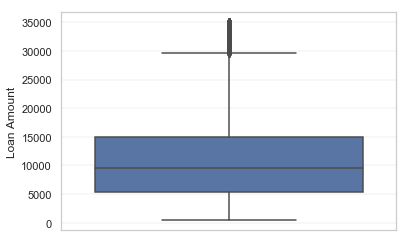

In [243]:
sns.boxplot( y=df["loan_amnt"] )
plt.ylabel('Loan Amount')
plt.show()

In [244]:
clean_loan_data['loan_amnt'].describe()

count   38,577.00
mean    11,047.03
std      7,348.44
min        500.00
25%      5,300.00
50%      9,600.00
75%     15,000.00
max     35,000.00
Name: loan_amnt, dtype: float64

**Inference Drawn :**

>> - The loan amount varies from 500 to 35,000 having mean of 10,000. There are outliers loan amounts after 30,000
>> - 25% to 75% of the loan amount of applications range from 5,000 to 10,000

**Recommendation:**

>> - Based on the box plot derived from historical data Loan amount applied by potential borrowers varies from 0 to 35,000 . With an average around 2,809 borrowers looking for 10,000 loan. 
>> - Investors are recommended to buy the notes between 5,000 to 15,000 (Lending loan between 5,000 to 15,000) . Lending 10,000 is highly recommended.


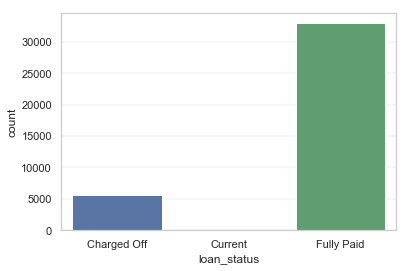

In [245]:
sns.countplot(x= clean_loan_data["loan_status"])
plt.show()

In [246]:
df["loan_status"].value_counts()

Fully Paid     32950
Charged Off     5627
Current            0
Name: loan_status, dtype: int64

**Inference:** 
>> - About 33,000 of the loans are Fully Paid. 
>> - About 14.5% of loan are having status as defaulters.
>> - Require further analysis here 

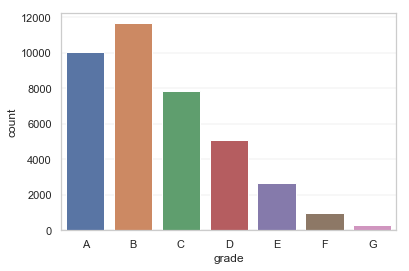

In [247]:
sns.countplot(x='grade', data=df)
plt.show()

In [248]:
df["grade"].value_counts()

B    11675
A    10045
C     7834
D     5085
E     2663
F      976
G      299
Name: grade, dtype: int64

**Inference:** 

>> - Most of the loans have grade of A and B. <br/>
>> - Most of the loans are high graded loans from about 10,045(A grade) and 11,675 (B Grade) 

**Recommendation:**

>> - It is recommend to investors to lend the loans to the High grade rated customers 
>> - If investors are looking for high interest rate it is recommended to go for C grade rated customers  

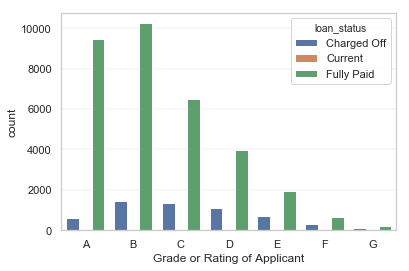

In [249]:
sns.countplot(x='grade', hue='loan_status', data=df)
plt.xlabel('Grade or Rating of Applicant')
plt.show()

In [250]:
df.groupby(['grade', 'loan_status']).agg({'loan_status': 'count'})

loan_status
grade loan_status             
A     Charged Off          602
      Fully Paid          9443
B     Charged Off         1425
      Fully Paid         10250
C     Charged Off         1347
      Fully Paid          6487
D     Charged Off         1118
      Fully Paid          3967
E     Charged Off          715
      Fully Paid          1948
F     Charged Off          319
      Fully Paid           657
G     Charged Off          101
      Fully Paid           198

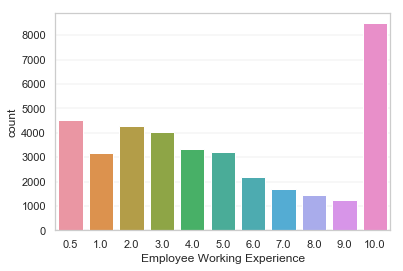

In [251]:
sns.countplot(x='emp_length_years', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

In [252]:
df["emp_length_years"].value_counts()

10.00    8488
0.50     4508
2.00     4291
3.00     4012
4.00     3342
5.00     3194
1.00     3169
6.00     2168
7.00     1711
8.00     1435
9.00     1226
Name: emp_length_years, dtype: int64

**Inference:** 

>> - Majority of employees about 8488 applying for the loan have more than 10 years of experience
>> - Next highest loan applications are by less than 1 yr experience employees (Previously <1 yr is imputed as 0.5), followed by 2 yrs.


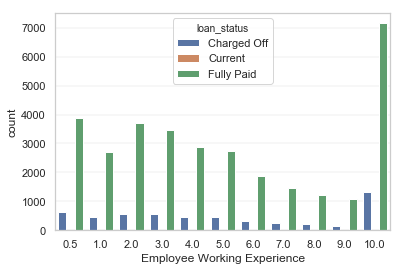

In [253]:
sns.countplot(x='emp_length_years', hue='loan_status', data=df)
plt.xlabel('Employee Working Experience')
plt.show()

In [254]:
df.groupby(['emp_length_years', 'loan_status']).agg({'loan_status': 'count'})

loan_status
emp_length_years loan_status             
0.50             Charged Off          639
                 Fully Paid          3869
1.00             Charged Off          456
                 Fully Paid          2713
2.00             Charged Off          567
                 Fully Paid          3724
3.00             Charged Off          555
                 Fully Paid          3457
4.00             Charged Off          462
                 Fully Paid          2880
5.00             Charged Off          458
                 Fully Paid          2736
6.00             Charged Off          307
                 Fully Paid          1861
7.00             Charged Off          263
                 Fully Paid          1448
8.00             Charged Off          203
                 Fully Paid          1232
9.00             Charged Off          158
                 Fully Paid          1068
10.00            Charged Off         1331
                 Fully Paid          7157

**Inference Drawn :**

>> - Most of the loan applications are launched by the 10+ years of experience employees
>> - Surprisingly next highest loan applicants are <1 Year experienced. 

**Recommendation:**

>> - It is recommend to investors to lend the loans to the employees having more than 10+ Years experience as default rate is comparatively less with the 10+ years of experience employees.

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


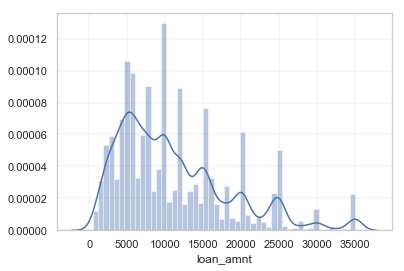

In [255]:
sns.distplot(df['loan_amnt'])
plt.show()

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


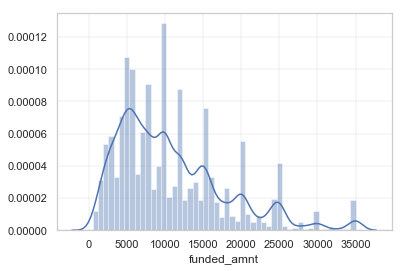

In [256]:
sns.distplot(df['funded_amnt'])
plt.show()

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


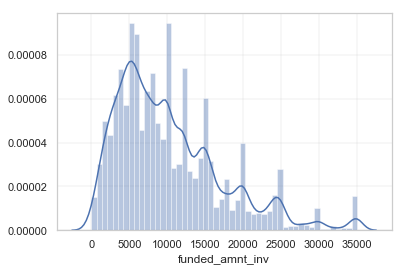

In [257]:
sns.distplot(df['funded_amnt_inv'])
plt.show()

**Inference Drawn:** 

>> - Loan amount is left skewed with long tail at right side. Most of the loan amount applied for is 5 lakhs
>> - Funded amount is left skewed with long tail at right side. Most of the loan amount given is 5 lakhs
>> - Funded amount by investors is left skewed with long tail at right side. Most of the loan amount given is 5 lakhs

**Recommendation**

>> - From the historical data analysis insight drawn as  most of the fund issued to the borrowers in the range of 5 lakhs .

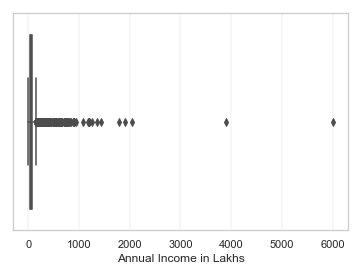

In [258]:
sns.boxplot(x=df['annual_inc_lakhs'])
plt.xlabel('Annual Income in Lakhs')
plt.show()

**Inference:** 

>> - There are only two applicants having annual income of more than 30 lakhs
>> - Most of the applicants have annual income less than 5 lakhs

**Recommendation:**

>> - Recommended to investors to show interest to fund loan to the employees having annual salary between 5 to 10 lakhs 


#### Filter to exclude the outlier 3000 and try to draw inference on max appicants income falls under which amount  

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


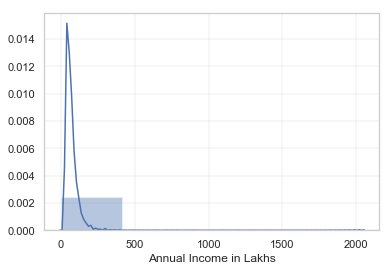

In [259]:
sns.distplot(df[df['annual_inc_lakhs'] < 3000]['annual_inc_lakhs'], bins=5)
plt.xlabel('Annual Income in Lakhs')
plt.show()

**Inference Drawn :** 

>> - From loan applicants, majority of the employees have salary less than 5 lakhs 

**Recommendation:**
>> - Recommended to investors to show interest to fund loan to the employees having annual salary around 5 lakhs 

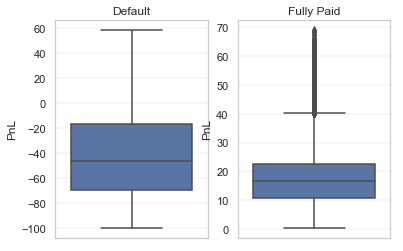

In [260]:
#Relationship of Funded Amount with defaults
plt.subplot(1,2,1)
plt.title('Default')
sns.boxplot(y=df[df.loan_status=='Charged Off'].PnL)


plt.subplot(1,2,2)
plt.title('Fully Paid')
sns.boxplot(y=df[df.loan_status=='Fully Paid'].PnL)
plt.show()

**Inference Drawn :** 

>> - Above box plot show the relationship between funded amount with defaults
>> - Mean of the profit is around 15% where as Mean of the loss is -45%
>> - Profit varies from 0% to 40%, first quartile profit is 10% and 3rd quartile profit is 20%. Profit goes to up 70% profit
>> - Where as first quartile loss is about -19% and third quartile is -70%. If some one defaults with out paying single installment loss goes to -100%. 

**Recommendation**
>> - Required further analysis before make any recommendation. Ex: By Grade, By Purpose and By Loan term .etc.

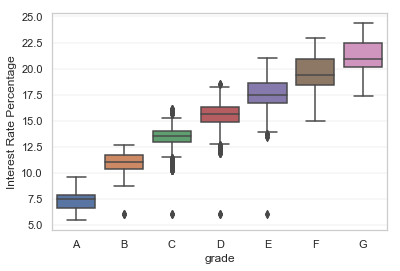

In [261]:
sns.boxplot(y='int_rate_percentage', x='grade', data=df)
plt.ylabel('Interest Rate Percentage')
plt.show()

**Inference Drawn :** 

>> - It’s very clear that historically applicants with high grade of credit rating are offered lower interest rate

**Recommendation:**

>> - Recommended to investors to offer around 7% to A grade , 11% to B grade , 13% to C grade, 16% to D grade , 17.5% to E grade, 19% to F grade and around 21% to G grade rating applicants. 


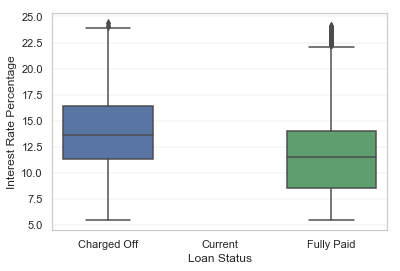

In [262]:
sns.boxplot(y='int_rate_percentage', x='loan_status', data=df)
plt.ylabel('Interest Rate Percentage')
plt.xlabel('Loan Status')
plt.show()

**Inference Drawn :**

>> - It’s very clear that historically applicants with high grade of credit rating are offered lower interest A grade =7% , B grade=11% , C grade= 13%, D grade= 16% , E grade= 17.5%, F grade= 19% and around 21% to G Grade 
>> - Insight drawn from above box plot between Interest rate percentage and loan status is historically more defaulters are from the higher interest rate borrowers. 

**Recommendation:**

>> - It is recommended to the investors to lend the loan to A and B  graded rating loan applicants to avoid risk of default.
>> - As the first quartile (25%) of the charged off(default) starts from 11.5% interest rate and the C-grade interest rate starts from 13% not recommended to approve loan for C to G grade rating.

## Segmented Univariate Analysis

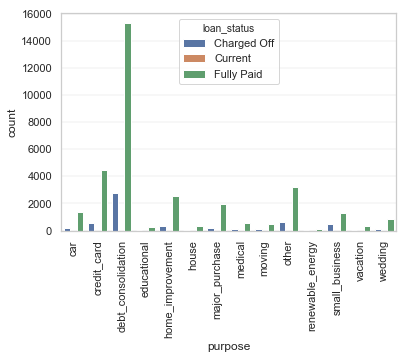

In [263]:
sns.countplot(x='purpose', hue="loan_status", data=df)
plt.xticks(rotation=90)
plt.show()

**Inference Drawn :**

>> - Most of the loans are granted for debt consolidation plans
>> - All the loans approved for debt consolidation are fully paid

**Recommendation:**

>> - It is recommended to the investors to lend the loan to debt consolidation applications
>> - The second best option is to issue the debit card loans

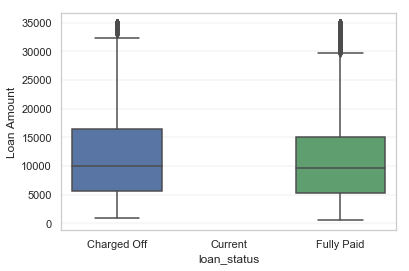

In [264]:
sns.boxplot( y="loan_amnt", x='loan_status' , data=df)
plt.ylabel('Loan Amount')
plt.show()

**Inference Drawn :**

>> - Fully paid changed off (Default) and Fully paid are almost same 
>> - 1st quartile (25%), Mean and 3rd quartile (75%) of the box plots took very close positions  

**Recommendation:**

>> - It is recommended to the investors to chose the applications wisely based on the other analysis results such as Grade, years of employment experience and annual income of the applicant .etc to avoid the risk of the default.


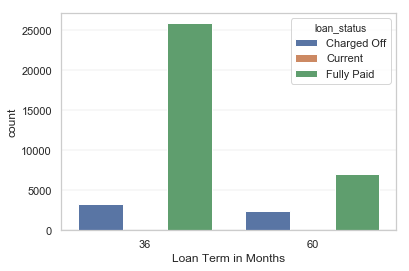

In [265]:
sns.countplot( x="term_months", hue='loan_status', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

**Inference Drawn :**
    
>> - Historically most of the loans falls in 36 months (3Years) term loans compared to 60 months (5 yrs) loan 

**Recommendation:**
    
>> - It is recommended to the investors to chose lower tenure to grab the business opportunity and to avoid the credit default risk
>> - Higher the tenure to pay back  comes with risk of fully pay back the loan by the borrower. 


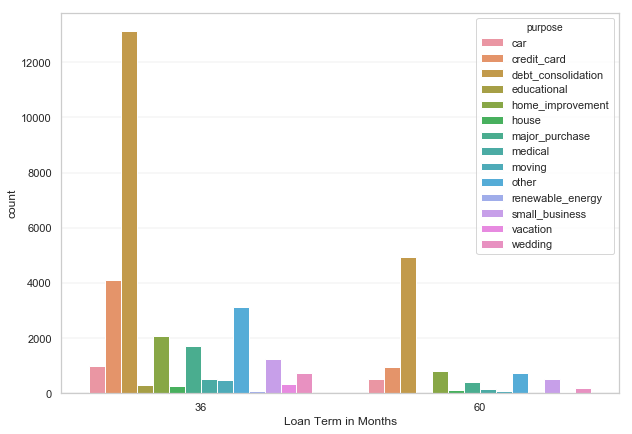

In [266]:
plt.figure(figsize=(10,7))
sns.countplot( x="term_months", hue='purpose', data=df)
plt.xlabel('Loan Term in Months')
plt.show()

**Inference Drawn :**

>> - Historically most of the loans falls in 36 months (3Years) term loan and debt consolidation plan are the combination of most of the investments  

**Recommendation:**

>> - It is recommended to the investors to chose lower tenure and debt consolidation to grab the business opportunity and to avoid the credit default risk
>> - As the most of debt consolidation are fully paid as well


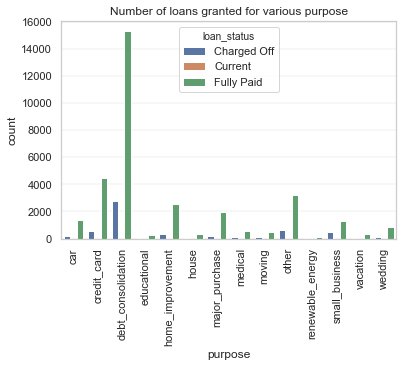

In [267]:
sns.countplot(x='purpose', hue='loan_status', data=df)
plt.title('Number of loans granted for various purpose')
plt.xticks(rotation=90)
plt.show()

**Inference Drawn :**
    
>> - Historically most of the loans are granted for debt consolidation and most of the loans are fully paid back

**Recommendation:**
    
>> - It is recommended to the investors to chose lower tenure and debt consolidation to grab the business opportunity and to avoid the credit default risk
As the debt consolidation are fully paid as well as heavily granted loans in the past

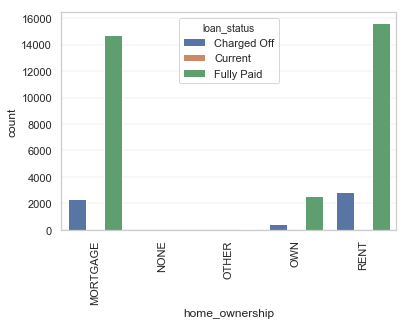

In [268]:
sns.countplot(x='home_ownership',hue='loan_status', data=df)
plt.xticks(rotation=90)
plt.show()

## Bivariate Plots

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


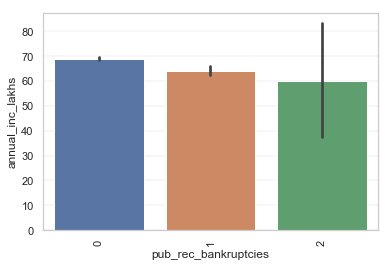

In [269]:
sns.barplot(y='annual_inc_lakhs', x='pub_rec_bankruptcies', data=df)
plt.xticks(rotation=90)
plt.show()

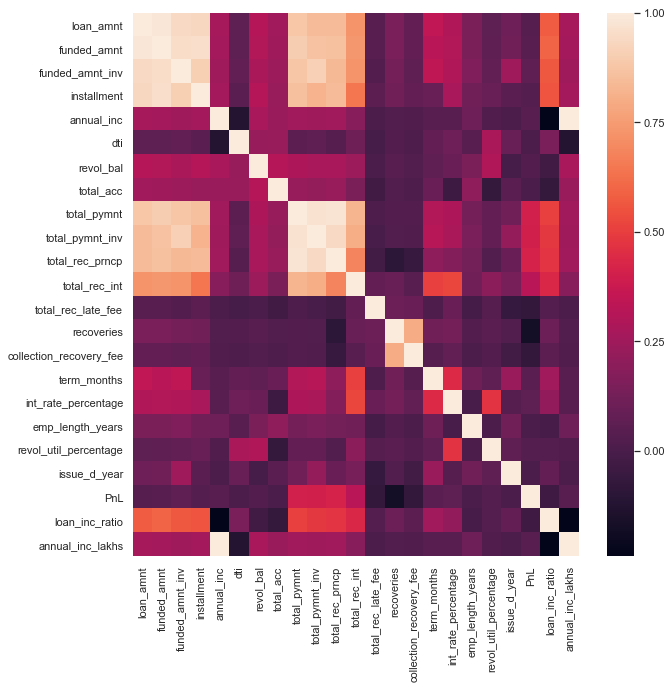

In [270]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())
plt.show()

**Inference Drawn :**

>> - Mean, 25% and 75% Loan amount of Fully paid and charged off is exactly same

**Recommendation:**

>> - It is recommended to the investors to consider the other factors to grab the opportunity of the business at the same time to lower the credit risk.


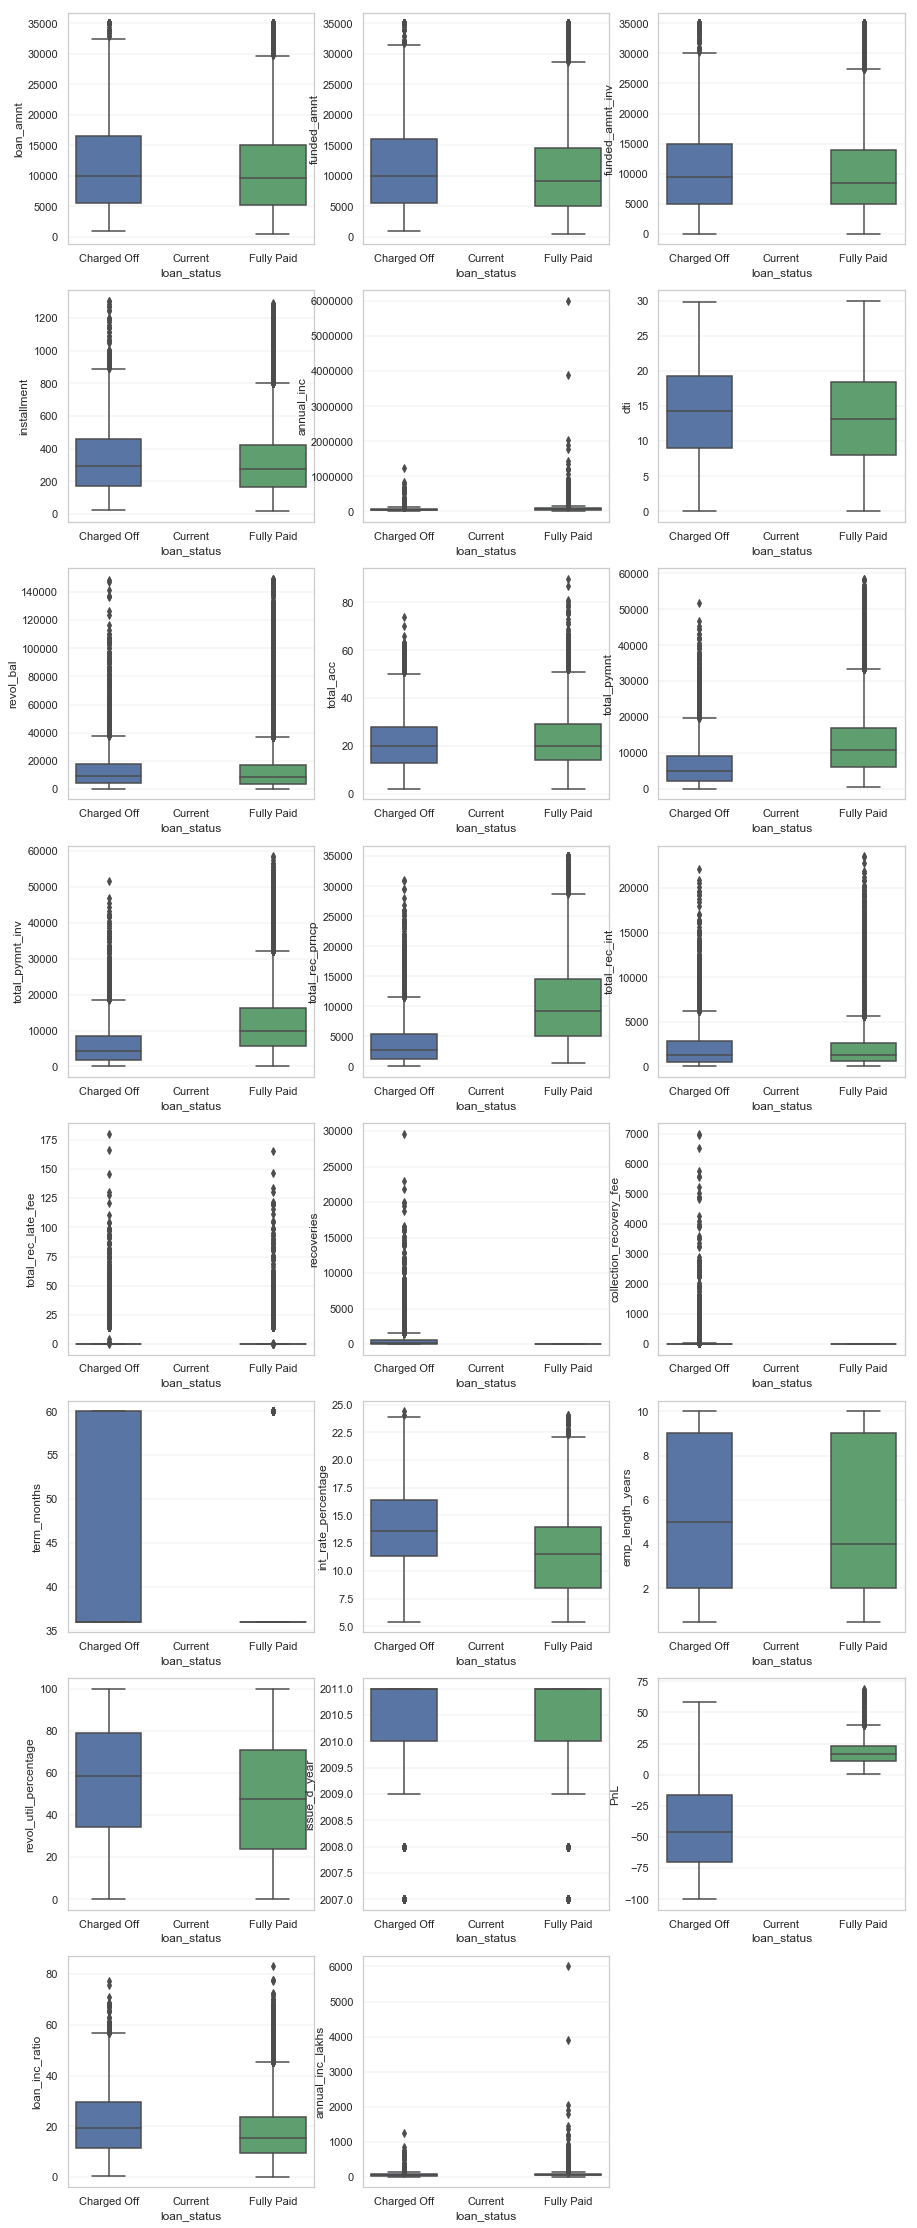

In [272]:
plt.figure(figsize=(15,40))


for i in range(len(numeric_data.columns)):
    plt.subplot(8,3, i + 1)
    sns.boxplot(y=numeric_data.columns[i], x='loan_status', data=df)

plt.show()

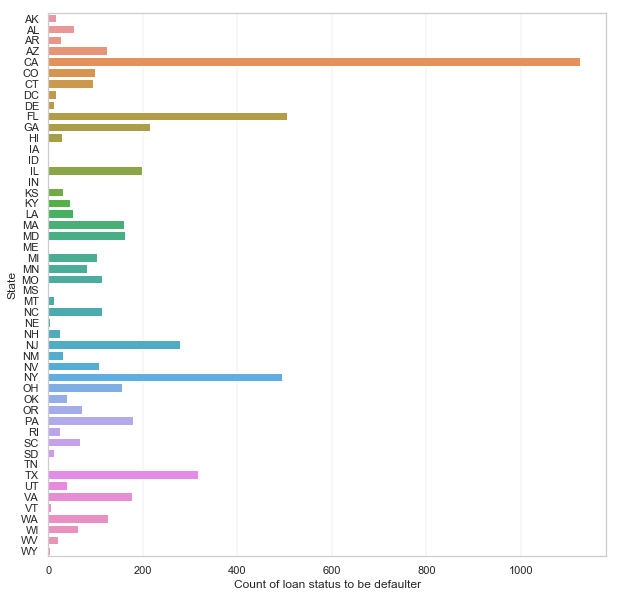

In [157]:
g = df[df['loan_status']=='Charged Off'].groupby('addr_state')['loan_status'].count().reset_index()
plt.figure(figsize=(10,10))
sns.barplot(y='addr_state', x='loan_status', data=g)
plt.xlabel('Count of loan status to be defaulter')
plt.ylabel('State')
plt.show()

**Inference Drawn :**

>> - Historically most of the loans from CA are charged off
>> - With that there are high chances that applicants from CA are to default. 

**Recommendation:**

>> - It is recommended to the investors to avoid lending money to the applicants from CA to avoid credit default risk

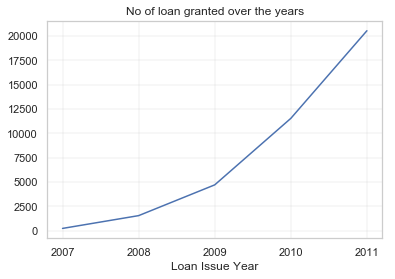

In [166]:
g = df.groupby('issue_d_year')['loan_status'].count()

g.plot.line(x_compat=True)
plt.xticks(np.arange(min(g.index), max(g.index)+1, 1.0))
plt.title('No of loan granted over the years')
plt.xlabel('Loan Issue Year')
plt.show()

**Inference:** 

>> - Loan Applicants and approvals have been increasing exponentially from year 2007 to 2011

**Recommendation**

>> - Take a note on the 2008 financial crisis might cause increase in the number of loan applications related to debt consolidation.
>> - In long run such as 3 years most of the debt consolidation loans are fully paid

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


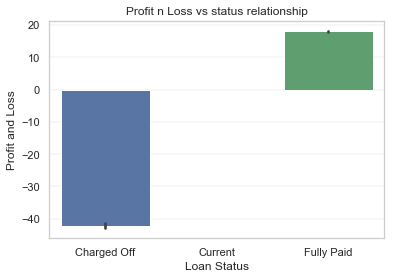

In [158]:
# Relationship of default with funded amount with a barplot
sns.barplot(x='loan_status',y='PnL',data=df)
plt.xlabel("Loan Status")
plt.ylabel("Profit and Loss")

plt.title("Profit n Loss vs status relationship")

plt.show()

C:\Users\rajes\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


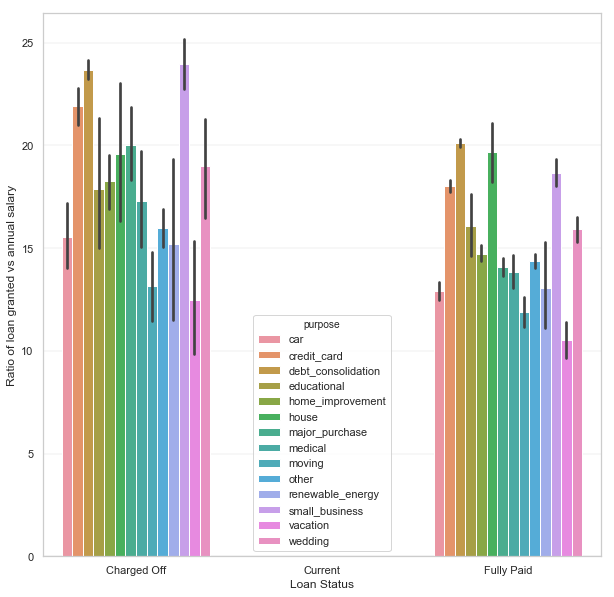

In [159]:
plt.figure(figsize=(10,10))

sns.barplot(x='loan_status',y='loan_inc_ratio',hue='purpose',data=df)
plt.xlabel('Loan Status')
plt.ylabel('Ratio of loan granted vs annual salary')
plt.show()

**Inference Drawn :** 
>> - An interesting inference drawn from Loan to Income ratio
>> - Highest charged off (defaulters) are from debt consolidation and small businesses 

**Recommendation:**
>> - It is recommended to the investors to carefully consider the applicants loan to income ratio before granting loan to debt consolidation application.
>> - If the loan to income ratio is high it is higly recommended to reject the application to avoid credit default risk


In [160]:
df_agg = df[df['funded_amnt'] <= 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

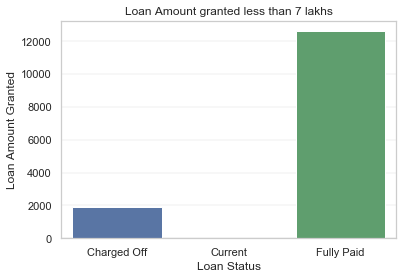

In [161]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted less than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

In [162]:
df_agg = df[df['funded_amnt'] > 7000].groupby(['loan_status'])['funded_amnt'].count().reset_index()

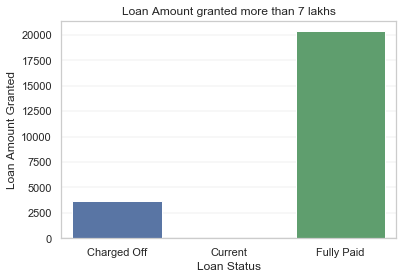

In [163]:
sns.barplot(x='loan_status', y='funded_amnt', data=df_agg)
plt.title('Loan Amount granted more than 7 lakhs')
plt.xlabel('Loan Status')
plt.ylabel('Loan Amount Granted')
plt.show()

**Inference Drawn :** 
>> - More amount of loan is granted  to the loan applications of more than 7 lakhs.

**Recommendation:**
>> - As initially recommended ,It is suggest to the investors to grant the loan between 5 to 10 lakhs to avoid credit default risk and to grab the opportunities. Historically loans are heavily funded at around 5 lakhs


## <font color = green> DRAWING INFERENCES AND MAKING RECOMMENDATIONS TO INVESTORS BY USING ***EXPLORATORY DATA ANALYSIS*** ENDS HERE <font/> 